In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-40.0808440914451, -97.45696445935826),
 (75.33413693638119, 112.68134062607663),
 (12.963194065121044, -123.74240702560138),
 (-10.862513568360129, -161.4586709675916),
 (-42.002038060615185, 9.255785965704831),
 (6.519870829618981, 124.42967801168976),
 (3.473048216088955, -97.59370006696186),
 (42.002128815558734, 152.2035141383813),
 (47.53021372325114, -166.5231222549774),
 (55.91235416786617, 75.58251609028011),
 (-24.1788051913736, 173.30754923613108),
 (30.769399392326946, -60.294902308807266),
 (-40.40589028688239, -107.13822716228438),
 (67.86559789276006, 83.0913792160253),
 (33.634491385092815, -5.102083908667652),
 (-59.64441244055756, -61.01940356058978),
 (71.6333636704862, -163.50189605852756),
 (34.63829035485438, -90.64879915999566),
 (63.17317542493396, -27.930650623254024),
 (51.26090955206206, 22.319382192511057),
 (84.39239416190523, -156.0252693365233),
 (-9.15231975523497, 114.8153748871922),
 (-15.366040119656546, 55.32893753268607),
 (24.988640790994992, -12

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
cities

['ancud',
 'saskylakh',
 'cabo san lucas',
 'samusu',
 'cape town',
 'daguma',
 'puerto ayora',
 'sentyabrskiy',
 'bethel',
 'ust-tarka',
 'vao',
 'saint george',
 'rikitea',
 'karaul',
 'fez',
 'ushuaia',
 'barrow',
 'west helena',
 'olafsvik',
 'poniatowa',
 'denpasar',
 'antalaha',
 'san quintin',
 'avera',
 'norrtalje',
 'busselton',
 'tazovskiy',
 'najran',
 'qaanaaq',
 'bengkulu',
 'vestmannaeyjar',
 'ambovombe',
 'yellowknife',
 'richards bay',
 'mys shmidta',
 'north bend',
 'mehran',
 'saint-philippe',
 'santa fe',
 'hualmay',
 'millinocket',
 'sao filipe',
 'dikson',
 'kamogawa',
 'pemba',
 'merauke',
 'otacilio costa',
 'constitucion',
 'narsaq',
 'avarua',
 'nenjiang',
 'butaritari',
 'jamestown',
 'dolores',
 'airai',
 'barentsburg',
 'mar del plata',
 'hilo',
 'sapa',
 'henties bay',
 'kallaste',
 'shalakusha',
 'nizhneyansk',
 'belushya guba',
 'tasiilaq',
 'faya',
 'taolanaro',
 'broome',
 'tatawin',
 'atuona',
 'mataura',
 'lebu',
 'jalu',
 'sokode',
 'polyarnyy',
 'la

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | daguma
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ust-tarka
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | karaul
City not found. Skipping...
Processing Record 15 of Set 1 | fez
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | west helena
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | poniatowa
Processing Record 21 of Set 1 | denpasar
Proc

Processing Record 38 of Set 4 | borba
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | middle island
Processing Record 41 of Set 4 | lvov
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 4 | camalu
Processing Record 44 of Set 4 | poso
Processing Record 45 of Set 4 | boyolangu
Processing Record 46 of Set 4 | ossora
Processing Record 47 of Set 4 | slatina
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | maniitsoq
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 4 of Set 5 | coolum beach
Processing Record 5 of Set 5 | mopti
Processing Record 6 of Set 5 | castro
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | grindavik
Processing Record 9 of Set 5 | locri
Processing Record 10 of Set 5 | omaru

Processing Record 27 of Set 8 | umm kaddadah
Processing Record 28 of Set 8 | ilo
Processing Record 29 of Set 8 | susangerd
Processing Record 30 of Set 8 | mastung
Processing Record 31 of Set 8 | oshnaviyeh
Processing Record 32 of Set 8 | wahran
City not found. Skipping...
Processing Record 33 of Set 8 | monok
Processing Record 34 of Set 8 | karasburg
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | bourail
Processing Record 37 of Set 8 | vila velha
Processing Record 38 of Set 8 | berlevag
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | bayan
Processing Record 41 of Set 8 | galle
Processing Record 42 of Set 8 | singkang
Processing Record 43 of Set 8 | vitimskiy
City not found. Skipping...
Processing Record 44 of Set 8 | chengmai
City not found. Skipping...
Processing Record 45 of Set 8 | ballina
Processing Record 46 of Set 8 | gotsu
Processing Record 47 of Set 8 | tarsus
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Se

Processing Record 10 of Set 12 | krasnoselkup
Processing Record 11 of Set 12 | mamallapuram
Processing Record 12 of Set 12 | warqla
City not found. Skipping...
Processing Record 13 of Set 12 | akureyri
Processing Record 14 of Set 12 | muzhi
Processing Record 15 of Set 12 | murgab
Processing Record 16 of Set 12 | sistranda
Processing Record 17 of Set 12 | lasa
Processing Record 18 of Set 12 | kununurra
Processing Record 19 of Set 12 | derzhavinsk
Processing Record 20 of Set 12 | katherine
Processing Record 21 of Set 12 | zhezkazgan
Processing Record 22 of Set 12 | dogondoutchi
Processing Record 23 of Set 12 | talara
Processing Record 24 of Set 12 | sataua
City not found. Skipping...
Processing Record 25 of Set 12 | wajima
Processing Record 26 of Set 12 | turayf
Processing Record 27 of Set 12 | roald
Processing Record 28 of Set 12 | hope
Processing Record 29 of Set 12 | makinsk
Processing Record 30 of Set 12 | doka
Processing Record 31 of Set 12 | hirado
Processing Record 32 of Set 12 | 

In [11]:
len(city_data)

557

In [12]:
city_data

[{'City': 'Ancud',
  'Lat': -41.8697,
  'Lng': -73.8203,
  'Max Temp': 56.73,
  'Humidity': 95,
  'Cloudiness': 1,
  'Wind Speed': 0.25,
  'Country': 'CL',
  'Date': '2022-01-07 07:31:45'},
 {'City': 'Saskylakh',
  'Lat': 71.9167,
  'Lng': 114.0833,
  'Max Temp': -23.19,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 2.73,
  'Country': 'RU',
  'Date': '2022-01-07 07:31:45'},
 {'City': 'Cabo San Lucas',
  'Lat': 22.8909,
  'Lng': -109.9124,
  'Max Temp': 69.51,
  'Humidity': 75,
  'Cloudiness': 3,
  'Wind Speed': 1.01,
  'Country': 'MX',
  'Date': '2022-01-07 07:30:58'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 80.11,
  'Humidity': 59,
  'Cloudiness': 0,
  'Wind Speed': 5.99,
  'Country': 'ZA',
  'Date': '2022-01-07 07:29:42'},
 {'City': 'Daguma',
  'Lat': 6.5867,
  'Lng': 124.5472,
  'Max Temp': 87.33,
  'Humidity': 61,
  'Cloudiness': 73,
  'Wind Speed': 2.53,
  'Country': 'PH',
  'Date': '2022-01-07 07:31:46'},
 {'City': 'Puerto Ayora',
  'La

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,56.73,95,1,0.25,CL,2022-01-07 07:31:45
1,Saskylakh,71.9167,114.0833,-23.19,100,100,2.73,RU,2022-01-07 07:31:45
2,Cabo San Lucas,22.8909,-109.9124,69.51,75,3,1.01,MX,2022-01-07 07:30:58
3,Cape Town,-33.9258,18.4232,80.11,59,0,5.99,ZA,2022-01-07 07:29:42
4,Daguma,6.5867,124.5472,87.33,61,73,2.53,PH,2022-01-07 07:31:46
5,Puerto Ayora,-0.7393,-90.3518,70.61,89,18,5.57,EC,2022-01-07 07:31:46
6,Bethel,41.3712,-73.4140,30.04,89,100,1.99,US,2022-01-07 07:31:47
7,Ust-Tarka,55.5672,75.7050,14.54,88,49,13.53,RU,2022-01-07 07:31:47
8,Vao,-22.6667,167.4833,77.11,66,11,20.09,NC,2022-01-07 07:31:47
9,Saint George,37.1041,-113.5841,41.32,64,0,3.62,US,2022-01-07 07:30:13


In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2022-01-07 07:31:45,-41.8697,-73.8203,56.73,95,1,0.25
1,Saskylakh,RU,2022-01-07 07:31:45,71.9167,114.0833,-23.19,100,100,2.73
2,Cabo San Lucas,MX,2022-01-07 07:30:58,22.8909,-109.9124,69.51,75,3,1.01
3,Cape Town,ZA,2022-01-07 07:29:42,-33.9258,18.4232,80.11,59,0,5.99
4,Daguma,PH,2022-01-07 07:31:46,6.5867,124.5472,87.33,61,73,2.53


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude Vs Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

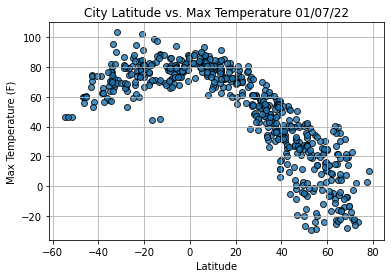

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

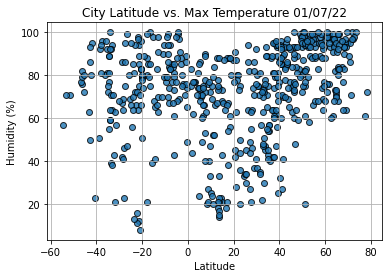

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

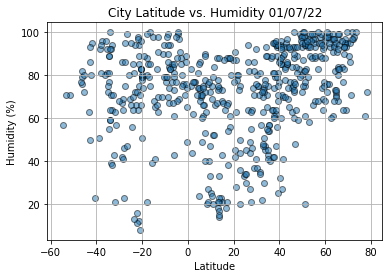

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

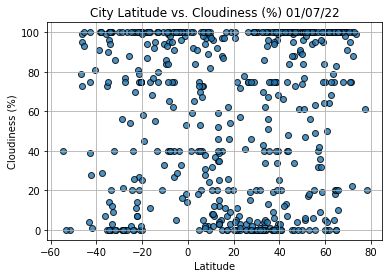

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

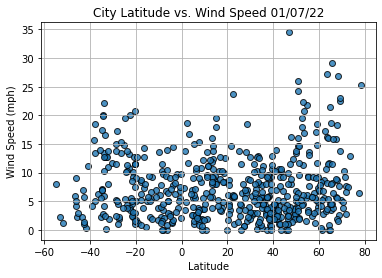

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()